# Explore reviewed detection history
Plot maps of number of individuals detected per point for each site and year

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
def figsize(w,h):
    plt.rcParams['figure.figsize']=[w,h]
figsize(15,5) #for big visuals
%config InlineBackend.figure_format = 'retina'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
# Download the publicly available PAM dataset. Put the path to the folder here:
dataset_dir = "../../../pam_dataset_v4/"

In [3]:
dethist = (
    pd.read_csv(
        f"{dataset_dir}/detection_history_complete.csv",
        index_col=0,
    )
    .drop(columns=["notes", "reviewer"])
    .reset_index(drop=True)
)
dethist.fillna(0, inplace=True)
dethist

,year,cluster_reviewed,5/15,5/16,5/17,5/18,5/19,5/20,5/21,5/22,5/23,5/24,5/25,5/26
0,2021,RK001_0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2022,RK001_0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2023,RK001_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,RK001_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,RK001_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2024,RK990_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1616,2021,RK990_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1617,2022,RK990_1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1618,2023,RK990_1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


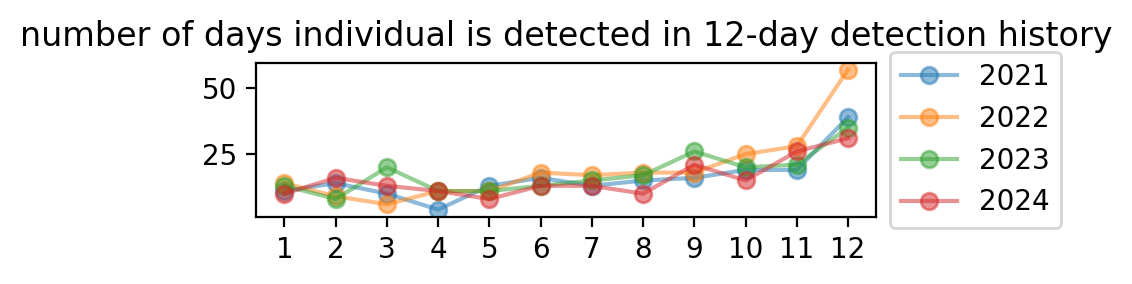

In [4]:
figsize(4, 1)
for year, yeardf in dethist.groupby("year"):
    counts, n = np.histogram(
        yeardf.drop(columns="year").set_index(["cluster_reviewed"]).sum(1),
        bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    )
    n = n[:-1]
    plt.plot(
        n[1:],
        counts[1:],
        label=year,
        alpha=0.5,
        marker="o",
    )
    plt.xticks(
        n[1:],
    )
plt.title("number of days individual is detected in 12-day detection history")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [5]:
all_cluster_samples = pd.read_csv(
    f"{dataset_dir}/all_clips_with_cleaned_clusters.csv",
    parse_dates=["datetime", "date", "time"],
)
all_cluster_samples["features3d"] = all_cluster_samples["features3d"].apply(eval)
all_cluster_samples["time"] = all_cluster_samples["time"].apply(lambda x: x.time())
all_cluster_samples["date"] = all_cluster_samples["date"].apply(lambda x: x.date())
all_cluster_samples["year"] = all_cluster_samples["date"].apply(lambda x: x.year)

/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_37959/1470212603.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_cluster_samples = pd.read_csv(


In [6]:
all_cluster_samples.groupby("year").size()

year
2021    29586
2022    47026
2023    38588
2024    32679
dtype: int64

In [7]:
all_cluster_samples["date1"] = all_cluster_samples["date"].apply(
    lambda x: x.replace(year=2000)
)
all_cluster_samples["year"] = all_cluster_samples.date.apply(lambda x: x.year)

### for a given point, visualize each individual's activity over the course of a season, for each year

In [ ]:
# visualize 10 points
n_individuals_per_point = all_cluster_samples.groupby(["point_code"])[
    "cluster_reviewed"
].nunique()
diverse_points = n_individuals_per_point[n_individuals_per_point > 3].index

import seaborn as sns

viz = all_cluster_samples[
    all_cluster_samples["point_code"].apply(lambda x: x in diverse_points)
]
# # Create the FacetGrid, ensuring data is divided by the 'year' column
g = sns.FacetGrid(data=viz, col="year", row="point_code", sharey=True, sharex=False)

# Map the `sns.histplot` to each subset of data
g.map_dataframe(sns.histplot, x="date", hue="cluster_reviewed", multiple="stack")

# Adjust the layout for clarity
g.set_axis_labels("Date", "Count")
g.set_titles("Year: {col_name}")
g.tight_layout()

# plt.savefig('../../figures/per_point_activity_across_dates.pdf')
plt.show()

In [ ]:
all_cluster_samples.groupby(["year", "site"])["cluster_reviewed"].nunique()

In [ ]:
all_cluster_samples.groupby(["year", "site"]).size()

In [ ]:
all_cluster_samples["date1"] = all_cluster_samples["date"].apply(
    lambda x: x.replace(year=2000)
)

In [9]:
# load table of location and habitat variables
points = pd.read_csv(
    f"{dataset_dir}/habitat_measures_at_points.csv",
    index_col="point_code",
)

add coordinates to detection df:

In [ ]:
# all_cluster_samples["utm_E"] = all_cluster_samples.point_code.map(points["utm_E"])
# all_cluster_samples["utm_N"] = all_cluster_samples.point_code.map(points["utm_N"])
# all_cluster_samples["utm_zone"] = all_cluster_samples.point_code.map(
#     points["utm_zone"]
# ).astype(int)
# all_cluster_samples["utm_letter"] = all_cluster_samples.point_code.map(
#     points["utm_letter"]
# )
# all_cluster_samples["lon"] = all_cluster_samples.point_code.map(points["longitude"])
# all_cluster_samples["lat"] = all_cluster_samples.point_code.map(points["latitude"])

# map of N individuals per point for each site and year

In [10]:
det_hist = (
    pd.read_csv(
        f"{dataset_dir}/detection_history_complete.csv",
        index_col=0,
    )
    .drop(columns=["notes", "reviewer"])
    .reset_index(drop=True)
    .set_index("cluster_reviewed")
    .fillna(0)
)
det_hist["point_code"] = det_hist.index.to_series().apply(lambda x: x.split("_")[0])
det_hist["lon"] = det_hist.point_code.map(points["longitude"])
det_hist["lat"] = det_hist.point_code.map(points["latitude"])
det_hist["site"] = det_hist.point_code.map(points["site"])
date_cols = det_hist.columns[1:-4]

In [11]:
det_hist["detected"] = det_hist[date_cols].sum(axis=1) > 0
n_per_year = (
    det_hist[det_hist["detected"]]
    .reset_index()
    .groupby(["point_code", "year"])["cluster_reviewed"]
    .nunique()
)
n_per_year = n_per_year.unstack().fillna(0).astype(int)

In [12]:
n_per_year["longitude"] = (
    n_per_year.reset_index()["point_code"].map(points["longitude"]).values
)
n_per_year["latitude"] = (
    n_per_year.reset_index()["point_code"].map(points["latitude"]).values
)
n_per_year["site"] = n_per_year.reset_index()["point_code"].map(points["site"]).values

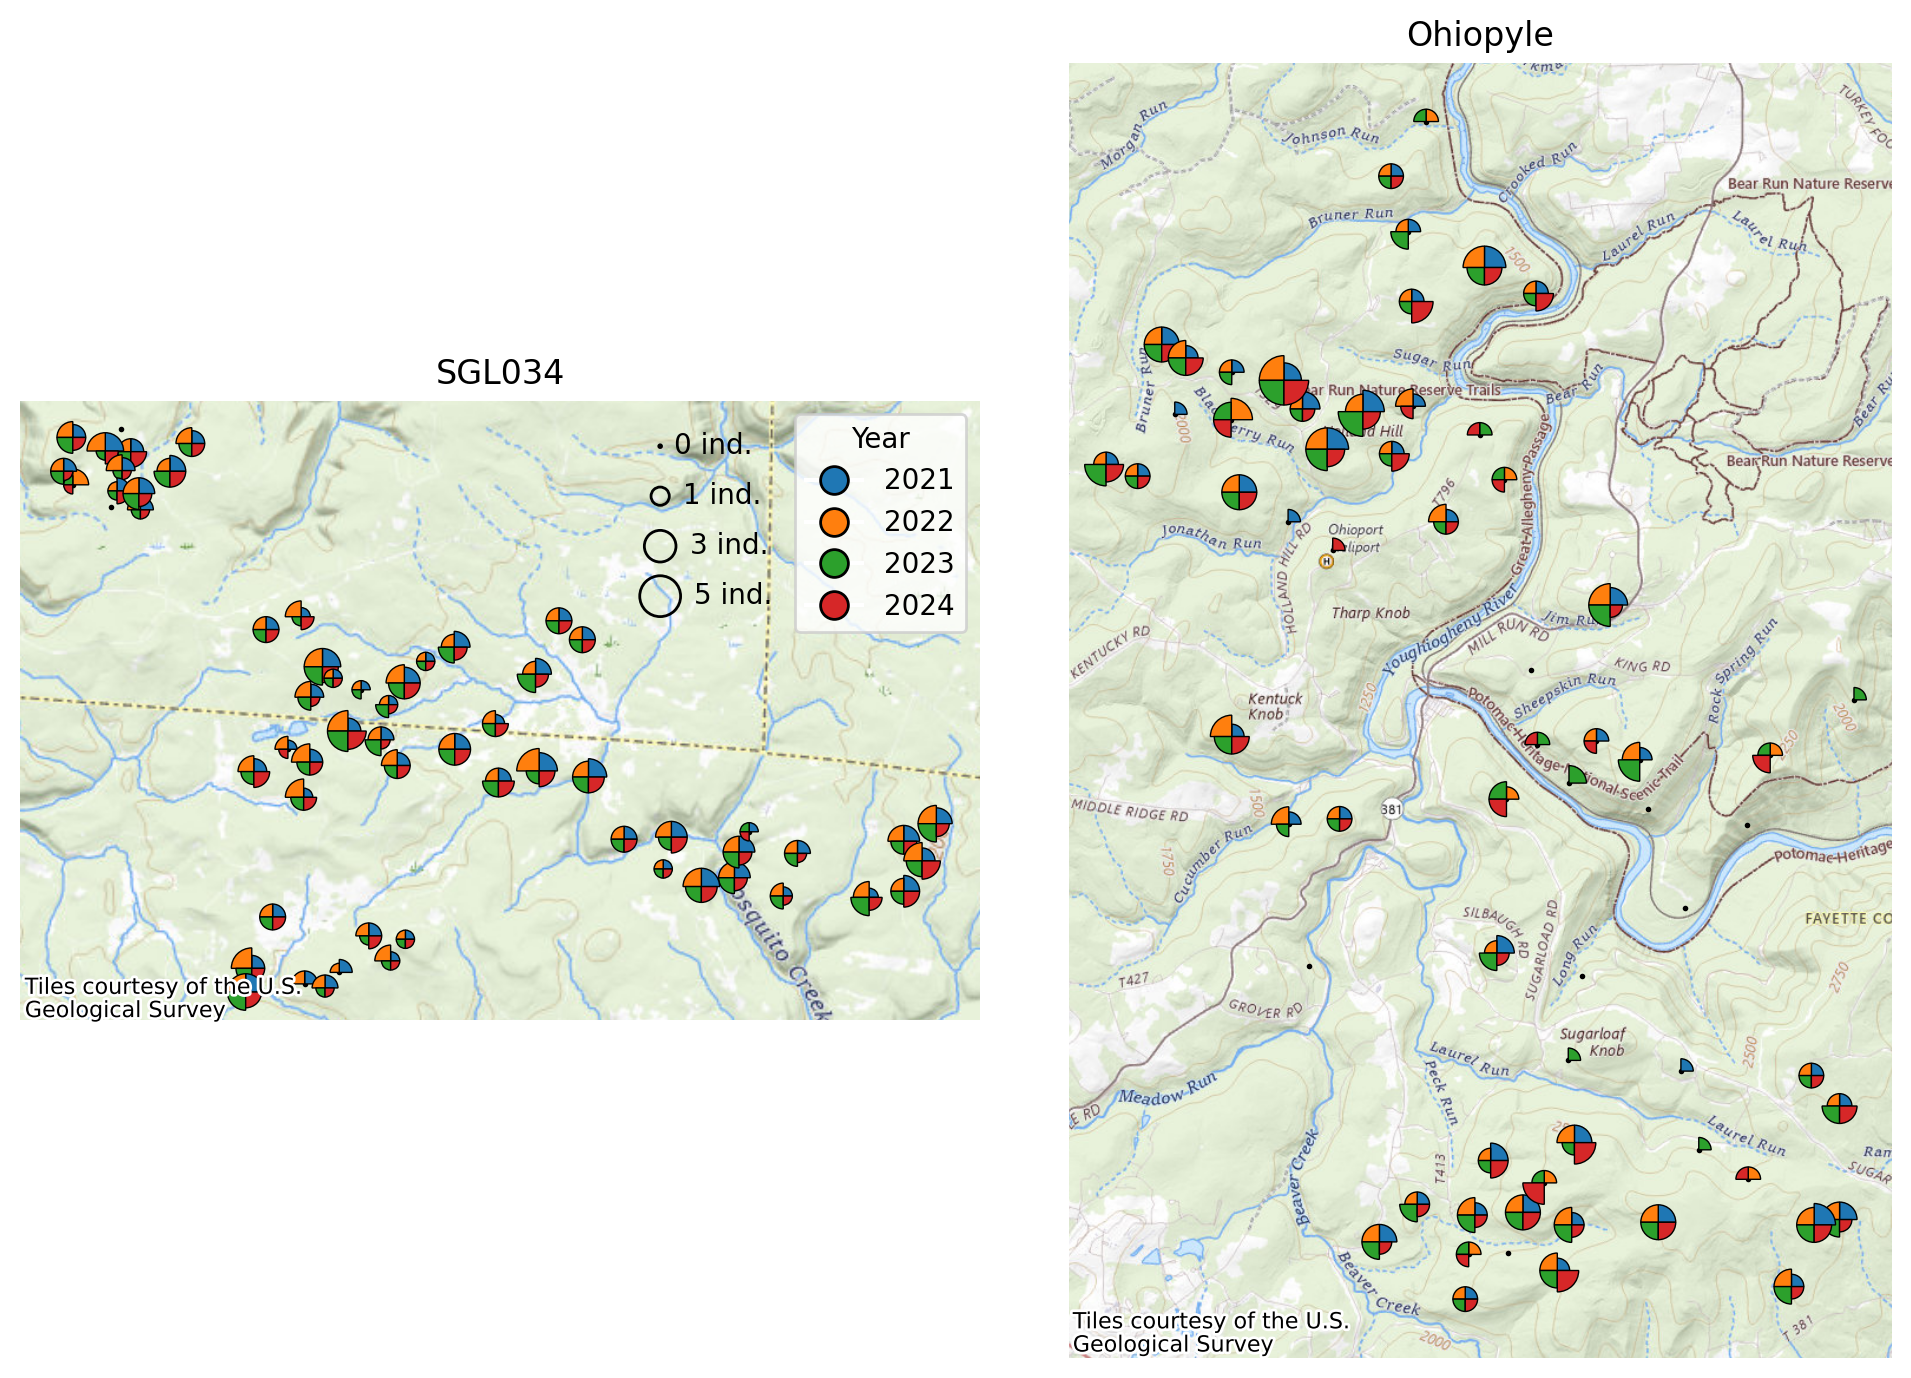

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.patches import Wedge

# Set year order and colors
year_cols = [2021, 2022, 2023, 2024]
year_colors = {2021: "tab:blue", 2022: "tab:orange", 2023: "tab:green", 2024: "tab:red"}
sites = n_per_year["site"].unique()

# Prepare GeoDataFrames
gdf_total = gpd.GeoDataFrame(
    n_per_year,
    geometry=gpd.points_from_xy(n_per_year.longitude, n_per_year.latitude),
    crs="EPSG:4326",
).to_crs(epsg=3857)

gdf_points = gpd.GeoDataFrame(
    points,
    geometry=gpd.points_from_xy(points.longitude, points.latitude),
    crs="EPSG:4326",
).to_crs(epsg=3857)

# Set up plot
fig, axes = plt.subplots(1, len(sites), figsize=(5 * len(sites), 7), squeeze=False)

# Scaling factor for radius (tune as needed)
scale_factor = 200

for j, site in enumerate(sites):
    ax = axes[0][j]
    site_subset = gdf_total[gdf_total["site"] == site].copy()

    # Plot ARU points in background
    gdf_points[gdf_points.site == site].plot(
        ax=ax,
        markersize=1,
        color="black",
        alpha=1,
    )

    # Loop over each point to draw pie slices
    for idx, row in site_subset.iterrows():
        x, y = row.geometry.x, row.geometry.y
        values = [row.get(y, 0) for y in year_cols]
        total = sum(values)

        # Optional: skip if all values are zero
        if total == 0:
            continue

        start_angle = 0
        for i, year in enumerate(year_cols):
            val = row.get(year, 0)
            if val <= 0:
                continue

            # Angle for quarter of circle
            theta = 360 / len(year_cols)
            # Radius proportional to value
            radius = np.sqrt(val) * scale_factor

            # Create wedge (year slice)
            wedge = Wedge(
                center=(x, y),
                r=radius,
                theta1=start_angle,
                theta2=start_angle + theta,
                facecolor=year_colors[year],
                edgecolor="k",
                linewidth=0.5,
                alpha=1,
            )
            ax.add_patch(wedge)
            start_angle += theta

    # Basemap and formatting
    ctx.add_basemap(ax, source=ctx.providers.USGS.USTopo)
    ax.set_title(f"{site}")
    ax.set_axis_off()

# Create  size reference circles
import matplotlib.patches as mpatches

# Define reference values
legend_values = [0, 1, 3, 5]
legend_radii = [np.sqrt(v) * scale_factor for v in legend_values]

# Coordinates for upper-left corner placement
# Use one of your points as anchor (or pick xmin, ymax manually)
ax = axes[0][0]
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

x0 = xmax - 7000  # adjust padding as needed
y0 = ymax - 1000  # top of the map

from matplotlib.lines import Line2D

legend_handles = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label=str(year),
        markerfacecolor=color,
        markeredgecolor="k",
        markersize=10,
    )
    for year, color in year_colors.items()
]
axes[0][0].legend(handles=legend_handles, title="Year", loc="upper right")


# Vertical spacing between circles
spacing = 2 * max(legend_radii) + 200  # room between circles

for i, (val, r) in enumerate(zip(legend_values, legend_radii)):
    yc = y0 - i * spacing  # stack downward
    circle = mpatches.Circle(
        (x0, yc),
        radius=np.max([r, 30]),
        facecolor="none",
        edgecolor="black",
        linewidth=1,
        zorder=5,
    )
    ax.add_patch(circle)
    ax.text(x0 + r + 300, yc, f"{val} ind.", va="center", fontsize=10)

plt.tight_layout()
plt.savefig("../../figures/FigureS9_combined_pie_map.pdf")
# plt.clf()

In [20]:
print(site_subset[year_cols].sum())

year
2021    63
2022    79
2023    86
2024    75
dtype: int64
